In [3]:
pip install git+https://github.com/huggingface/transformers.git torch

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-urvlaoxr
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-urvlaoxr
  Resolved https://github.com/huggingface/transformers.git to commit ba29a439adbe6f371710d0514659127264ae24b3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB

In [1]:
from transformers import AutoProcessor, AutoModelForImageTextToText, pipeline
import torch

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = AutoModelForImageTextToText.from_pretrained("stepfun-ai/GOT-OCR-2.0-hf", device_map=device)
processor = AutoProcessor.from_pretrained("stepfun-ai/GOT-OCR-2.0-hf")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/439 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.2k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/18.7M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/213 [00:00<?, ?B/s]

### Procesado de 1 pag / 1 page document

In [3]:
image = "https://huggingface.co/datasets/hf-internal-testing/fixtures_got_ocr/resolve/main/image_ocr.jpg"
inputs = processor(image, return_tensors="pt").to(device)

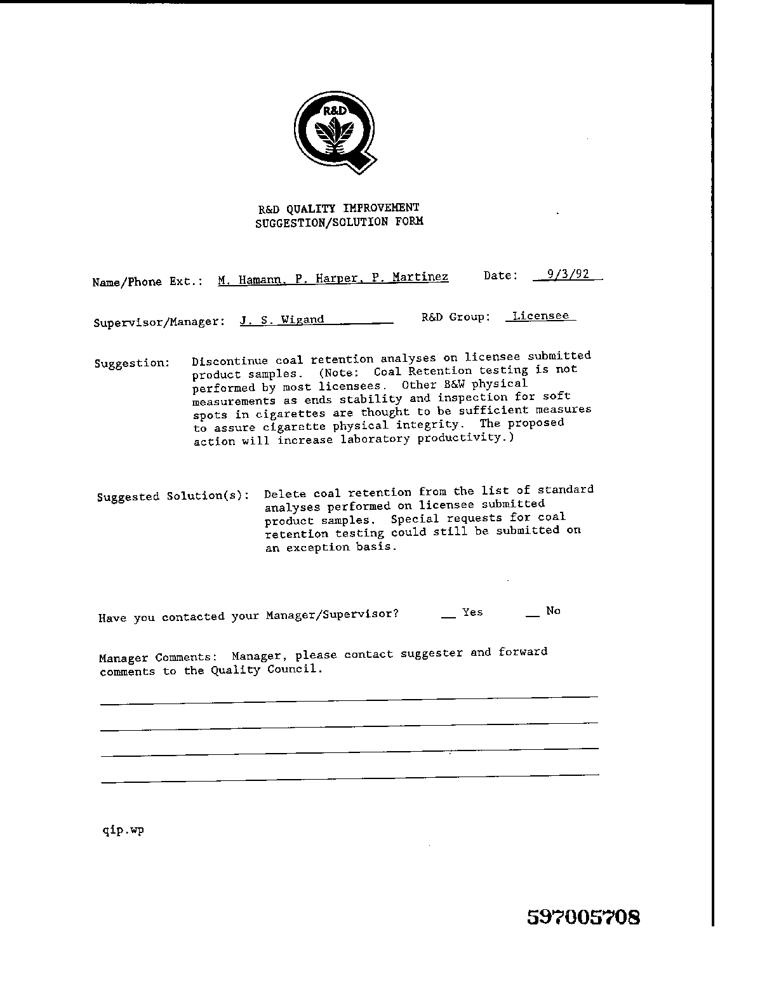

In [4]:
generate_ids = model.generate(
    **inputs,
    do_sample=False,
    tokenizer=processor.tokenizer,
    stop_strings="<|im_end|>",
    max_new_tokens=4096,
)

In [5]:
processor.decode(generate_ids[0, inputs["input_ids"].shape[1]:], skip_special_tokens=True)

'R&D QUALITY IMPROVEMENT\nSUGGESTION/SOLUTION FORM\nName/Phone Ext. : M. Hamann, P. Harper, P. Martinez\nDate: 9/3/92\nSupervisor/Manager: J. S. Wigand\nR&D Group: Licensee\nSuggestion:\nDiscontinue coal retention analyses on licensee submitted\nproduct samples. (Note: Coal Retention testing is not\nperformed by most licensees. Other B&W physical\nmeasurements as ends stability and inspection for soft\nspots in cigarettes are thought to be sufficient measures\nto assure cigarette physical integrity. The proposed\naction will increase laboratory productivity.)\nSuggested Solution(s) : Delete coal retention from the list of standard\nanalyses performed on licensee submitted\nproduct samples. Special requests for coal\nretention testing could still be submitted on\nan exception basis.\nHave you contacted your Manager/Supervisor?\nYes\nNo\nManager Comments: Manager, please contact suggester and forward\ncomments to the Quality Council.\nqip.wp\n597005708'

In [6]:
text = processor.decode(generate_ids[0], skip_special_tokens=True)

In [7]:
text

'system\nYou should follow the instructions carefully and explain your answers in detail.user\n\n OCR: assistant\nR&D QUALITY IMPROVEMENT\nSUGGESTION/SOLUTION FORM\nName/Phone Ext. : M. Hamann, P. Harper, P. Martinez\nDate: 9/3/92\nSupervisor/Manager: J. S. Wigand\nR&D Group: Licensee\nSuggestion:\nDiscontinue coal retention analyses on licensee submitted\nproduct samples. (Note: Coal Retention testing is not\nperformed by most licensees. Other B&W physical\nmeasurements as ends stability and inspection for soft\nspots in cigarettes are thought to be sufficient measures\nto assure cigarette physical integrity. The proposed\naction will increase laboratory productivity.)\nSuggested Solution(s) : Delete coal retention from the list of standard\nanalyses performed on licensee submitted\nproduct samples. Special requests for coal\nretention testing could still be submitted on\nan exception basis.\nHave you contacted your Manager/Supervisor?\nYes\nNo\nManager Comments: Manager, please conta

In [8]:
qna = pipeline("question-answering")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cuda:0


In [9]:
qna(
    question="what is the date of the document?",
    context=text
)

{'score': 0.6950666904449463, 'start': 216, 'end': 222, 'answer': '9/3/92'}

In [10]:
qna(
    question="what is the suggestion of the document?",
    context=text
)

{'score': 0.15706095099449158,
 'start': 621,
 'end': 658,
 'answer': 'will increase laboratory productivity'}

In [11]:
qna(
    question="is the document signed?",
    context=text
)

{'score': 0.001486312597990036,
 'start': 1031,
 'end': 1047,
 'answer': 'qip.wp\n597005708'}

In [12]:
qna(
    question="who is the supervisor of the document?",
    context=text
)

{'score': 0.5734374523162842,
 'start': 243,
 'end': 265,
 'answer': 'J. S. Wigand\nR&D Group'}

In [13]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cuda:0


In [14]:
summarizer(text)

[{'summary_text': ' Coal Retention testing is not currently performed by most licensees . The proposed action will increase laboratory productivity . Special requests for coal-retention testing could still be submitted on an exception basis . Have you contacted your Manager/Supervisor? Please contact suggester and forward comments to the Quality Council .'}]

### Multi-page

In [16]:
image1 = "https://huggingface.co/datasets/hf-internal-testing/fixtures_got_ocr/resolve/main/page1.png"
image2 = "https://huggingface.co/datasets/hf-internal-testing/fixtures_got_ocr/resolve/main/page2.png"
inputs2 = processor([image1, image2], return_tensors="pt", multi_page=True, format=True).to(device)

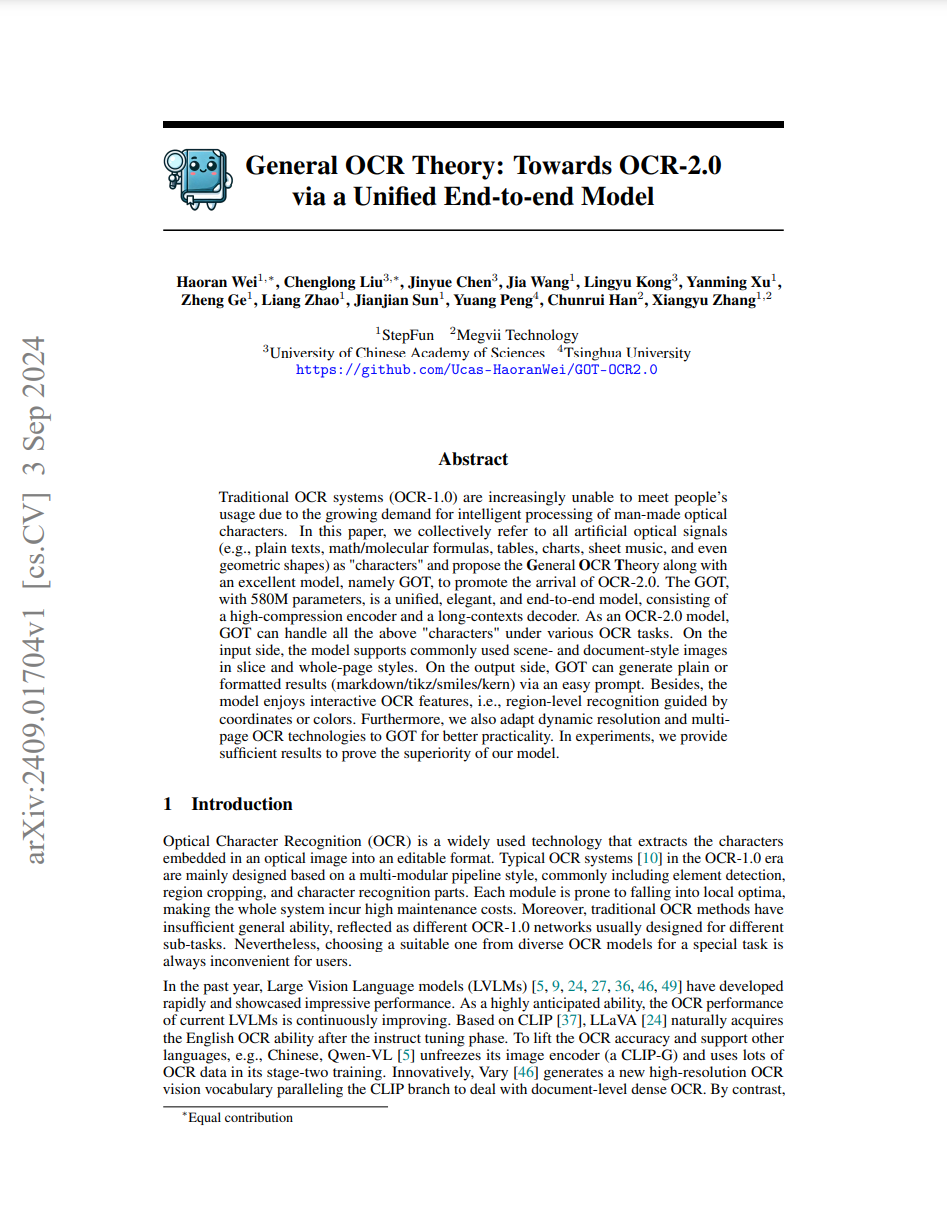

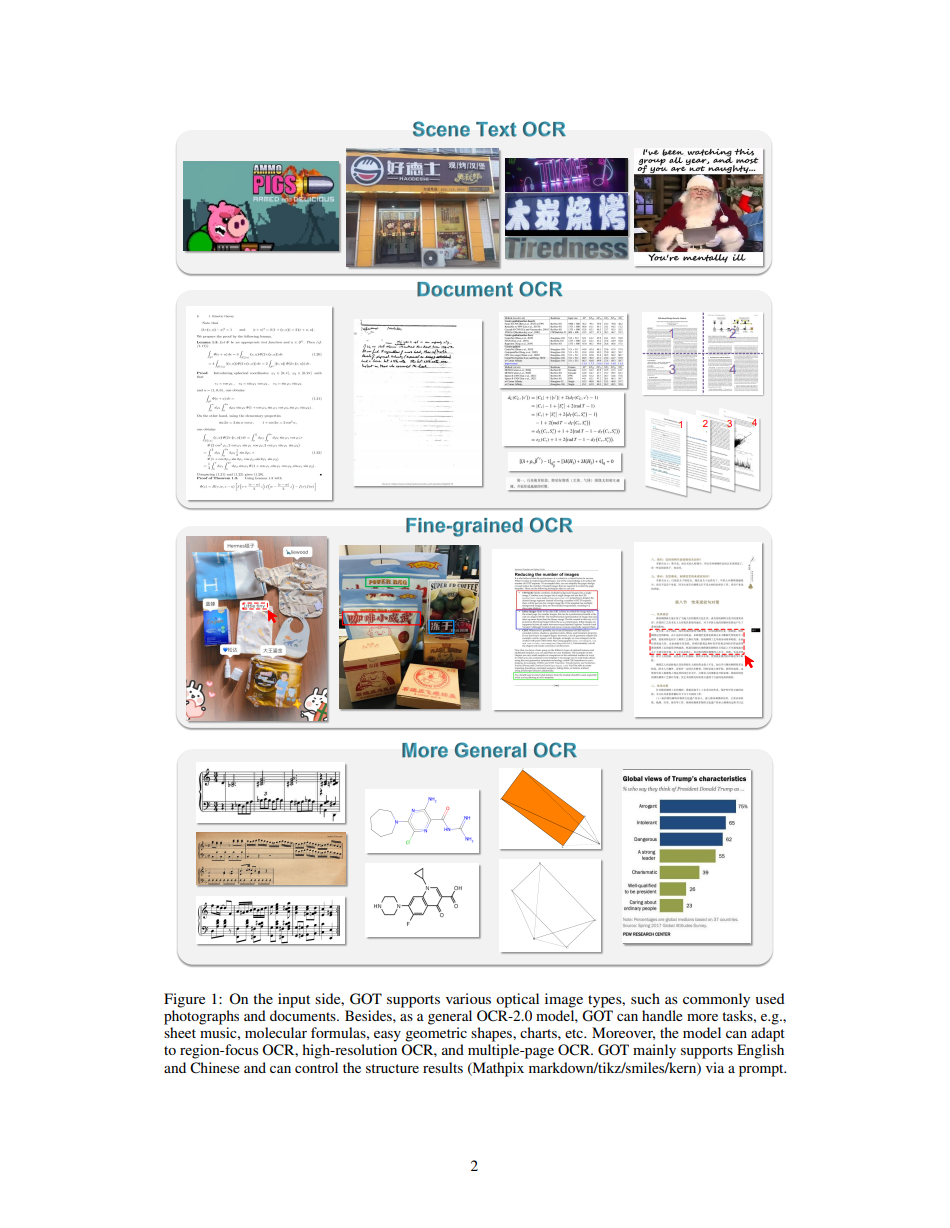

In [18]:
generate_ids_m = model.generate(
    **inputs,
    do_sample=False,
    tokenizer=processor.tokenizer,
    stop_strings="<|im_end|>",
    max_new_tokens=4096,
)

In [19]:
processor.decode(generate_ids_m[0, inputs2["input_ids"].shape[1]:], skip_special_tokens=True)

'\\title{\nGeneral OCR Theory: Towards OCR-2.0 via a Unified End-to-end Model\n}\n\\author{\nHaoran Wei \\({ }^{1, *}\\), Chenglong Liu \\({ }^{3, *}\\), Jinyue Chen \\({ }^{3}\\), Jia Wang \\({ }^{1}\\), Lingyu Kong \\({ }^{3}\\), Yanming \\(\\mathrm{Xu}^{1}\\), \\\\ Zheng Ge \\({ }^{1}\\), Liang Zhao \\({ }^{1}\\), Jianjian Sun \\({ }^{1}\\), Yuang Peng \\({ }^{4}\\), Chunrui Han \\({ }^{2}\\), Xiangyu Zhang \\({ }^{1,2}\\) \\\\ \\({ }^{1}\\) StepFun \\(\\quad{ }^{2}\\) Megvii Technology \\\\ \\({ }^{3}\\) University of Chinese Academy of Sciences \\({ }^{4}\\) Tsinghua University \\\\ https://github.com/Ucas-HaoranWei/GOT-OCR2.0\n}\n\n\n\\begin{abstract}\nTraditional OCR systems (OCR-1.0) are increasingly unable to meet people\'s usage due to the growing demand for intelligent processing of man-made optical characters. In this paper, we collectively refer to all artificial optical signals (e.g., plain texts, math/molecular formulas, tables, charts, sheet music, and even geometric sh

In [22]:
mp = processor.decode(generate_ids_m[0, inputs2["input_ids"].shape[1]:], skip_special_tokens=True)

In [23]:
summarizer(mp)

[{'summary_text': ' Traditional OCR systems (OCR-1.0) are increasingly unable to meet people\'s usage due to the growing demand for intelligent processing of man-made optical characters . We propose the General OCR Theory along with an excellent model, namely GOT, to promote the arrival of OCR-2.0 . GOT, with 580M parameters, is a unified, elegant, and end-to-end model, consisting of a high-compression encoder and long-contexts decoder . GOT can handle all the above "characters" under various OCR tasks .'}]